In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn import datasets
import random

In [51]:
#Criando um dataset
d = {'Peso': [5400,5450,83,5470,92,5300,80,85,5440,96,70,5300],
     'Altura': [2.9, 2.2,0.70,2.7,0.70,3,0.66,0.70,2.6,0.66,0.72,2.9],
    'Especie':['elefante','elefante','onça','elefante','onça','elefante','onça','onça','elefante','onça','onça','elefante']}
df=pd.DataFrame(data=d)
df

,Altura,Especie,Peso
0,2.90,elefante,5400
1,2.20,elefante,5450
2,0.70,onça,83
3,2.70,elefante,5470
4,0.70,onça,92
5,3.00,elefante,5300
6,0.66,onça,80
7,0.70,onça,85
8,2.60,elefante,5440
9,0.66,onça,96


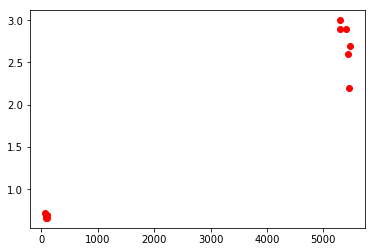

In [52]:
#Plotando cada membro do dataset para identificar as clusters
plt.plot(list(df['Peso']),list(df['Altura']),'ro')
plt.show()

In [62]:
#Implementação do k-means
def Lloyd(c1x,c1y,c2x,c2y):
    m1x=0
    m1y=0
    m2x=0
    m2y=0
    d1=[]
    d2=[]
    cont=0
    while cont<12:
        d=((c1x-df['Peso'][cont])**2+(c1y-df['Altura'][cont])**2)**0.5
        d1.append(d)
        d=((c2x-df['Peso'][cont])**2+(c2y-df['Altura'][cont])**2)**0.5
        d2.append(d)
        cont=cont+1
    cont=0
    cl1=[]
    cl2=[]
    while cont<12:
        if d1<=d2:
            cl1.append(cont)
        else:
            cl2.append(cont)
        cont=cont+1
    cont=0
    while cont<len(cl1):
        a=cl1[cont]
        m1x=m1x+df['Peso'][a]
        m1y=m1y+df['Altura'][a]
        cont=cont+1
    if cont != 0:
        
        m1x=m1x/cont
        m1y=m1y/cont

    cont=0
    while cont<len(cl2):
        a=cl2[cont]
        m2x=m2x+df['Peso'][a]
        m2y=m2y+df['Altura'][a]
        cont=cont+1
    if cont != 0:
        m2x=m2x/cont
        m2y=m2y/cont
    return m1x,m1y,m2x,m2y

In [63]:
#Dois valores aleatórios são gerados, simulando a seleção de dois membros do dataset
#para iniciar o k-means
r1=random.randint(0,12)
r2=random.randint(0,12)
c1x=df['Peso'][r1]
c1y=df['Altura'][r1]
c2x=df['Peso'][r2]
c2y=df['Altura'][r2]
a=Lloyd(c1x,c1y,c2x,c2y)
cont=0
#A função retorna as coordenadas da nova centroide que serao utilizadas novamente
#na funcao, ate ela convergir.
while cont<10:
    Lloyd(a[0],a[1],a[2],a[3])
    cont=cont+1
print(a)

(0, 0, 2738.8333333333335, 1.7033333333333331)
